# Cellular Automaton Visualization

This Jupyter Notebook demonstrates the generation of a Wolfram cellular automaton and visualizes it using a dynamic animation. 
Cellular automata are simple computational models capable of producing complex behavior from a set of basic rules.

## Sections

1. Helper functions
2. Main functions
3. Execution and visualization

## 1. Helper functions

Here we import the necessary libraries for our visualization.

- numpy: for numerical operations and array manipulation
- matplotlib.pyplot: for plotting the cellular automaton
- matplotlib.animation: for creating the animation
- numpy.ma: for working with masked arrays

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import numpy.ma as ma

In this section, we define two helper functions:

- window: Generates sliding windows of a specified length (default is 3) over an iterable object.
- get_rule: Takes an integer as input and returns a dictionary representing the corresponding Wolfram rule.
- random_init_state: Takes a integer and generates a string of 0s and 1s representing an initial state.
- interesting_rule_number: return a random choice of some interesting rules.


In [2]:
def window(iterable, stride=3):
    """
    Generate a sliding window of given stride over an iterable.

    Args:
        iterable: The sequence to slide the window over.
        stride: The size of the window.

    Yields:
        A subsequence of the input iterable with size equal to the stride.
    """
    for i in range(len(iterable) - stride + 1):
        yield iterable[i:i + stride]

def get_rule(n):
    """
    Get the rule dictionary for a given rule number.

    Args:
        n: The rule number, an integer between 0 and 255.

    Returns:
        A dictionary mapping 3-bit binary strings to their corresponding output
        according to the specified rule number.
    """
    rule_number = f"{n:08b}"[::-1]
    return {f"{i:03b}": rule_number[i] for i in range(8)}


def random_init_state(length):
    """
    Generates a random initial state of the specified length.

    Args:
        length (int): The length of the initial state.

    Returns:
        str: A binary string of the specified length, with random '0's and '1's.
    """
    return ''.join(np.random.choice(['0', '1']) for _ in range(length))

def interesting_rule_number():
    """
    Returns a random interesting rule number from a list of selected interesting rule numbers.

    Returns:
        int: A random interesting rule number.
    """
    interesting_rules = [30, 45, 54, 60, 62, 90, 901, 94, 110, 122, 126, 150, 182, 225]
    return np.random.choice(interesting_rules)

## 2. Cellular automaton

The generate_pattern function takes the initial state of the automaton, the rule dictionary, and the number of generations as input.
It then iteratively generates the cellular automaton pattern and stores each generation's state in a list, which is returned at the end.



In [3]:
def generate_pattern(state, rule, max_gen):
    """
    Generate a list of states according to the given initial state and rule.

    Args:
        state: The initial state as a string of '0's and '1's.
        rule: The rule dictionary.
        max_gen: The number of generations to generate.

    Returns:
        A list of states for each generation.
    """
    states = [state]
    for gen in range(max_gen):
        patterns = window(state)
        state = ''.join(rule[pat] for pat in patterns)
        state = '0{}0'.format(state)
        states.append(state)
    return states

In this section, we define two main functions for the visualization:

- update: The update function is called for each frame in the animation. It takes the current frame number, the list of states, and the image object to update. It creates a masked array based on the current frame and sets it as the new image data.
- visualize_pattern: This function takes the list of states and optional parameters for the animation interval, whether to save the animation as a gif, and the filename for the gif. It initializes the plot and creates the animation using the update function.


In [4]:
def update(frame, states, im):
    """
    Update the image for the animation.

    Args:
        frame: The current frame number.
        states: A list of states for each generation.
        im: The image object to update.
    """
    state_grid = np.array([[int(cell) for cell in row] for row in states[:frame+1]])
    padding = np.full((len(states) - frame - 1, len(states[0])), -1)
    state_grid = np.vstack((state_grid, padding))
    mask = state_grid == -1
    masked_state_grid = ma.array(state_grid, mask=mask)
    im.set_array(masked_state_grid)
    return [im]

def visualize_pattern(states, interval=200, save_as_gif=False, filename=None, size=10):
    """
    Visualize the pattern of states using an animated plot with matplotlib.

    Args:
        states: A list of states for each generation.
        interval: Time interval between frames in milliseconds.
        save_as_gif: Whether to save the animation as a gif file.
        filename: The filename to save the gif, if `save_as_gif` is True.
    """
    full_grid = np.full((len(states), len(states[0])), -1)
    fig, ax = plt.subplots(figsize=(size, size))
    mask = full_grid == -1
    masked_full_grid = ma.array(full_grid, mask=mask)
    im = ax.imshow(masked_full_grid, cmap='binary', origin='lower', aspect='auto', animated=True, vmin=0, vmax=1)
    
    ani = animation.FuncAnimation(fig, update, frames=len(states), fargs=(states, im),
                                  interval=interval, blit=True)

    plt.axis('off')

    if save_as_gif:
        if filename is None:
            filename = "cellular_automaton.gif"
        ani.save(filename, writer="pillow", dpi=90)
    else:
        plt.show()

## 3. Execution and visualization
Here, we set the number of generations to 100 and define the initial state of the cellular automaton. We then generate the pattern using the Rule 90 and visualize it using the visualize_pattern function. The animation is saved as a gif with the filename ```"cellular_automaton.gif"```.


#### Regular execution

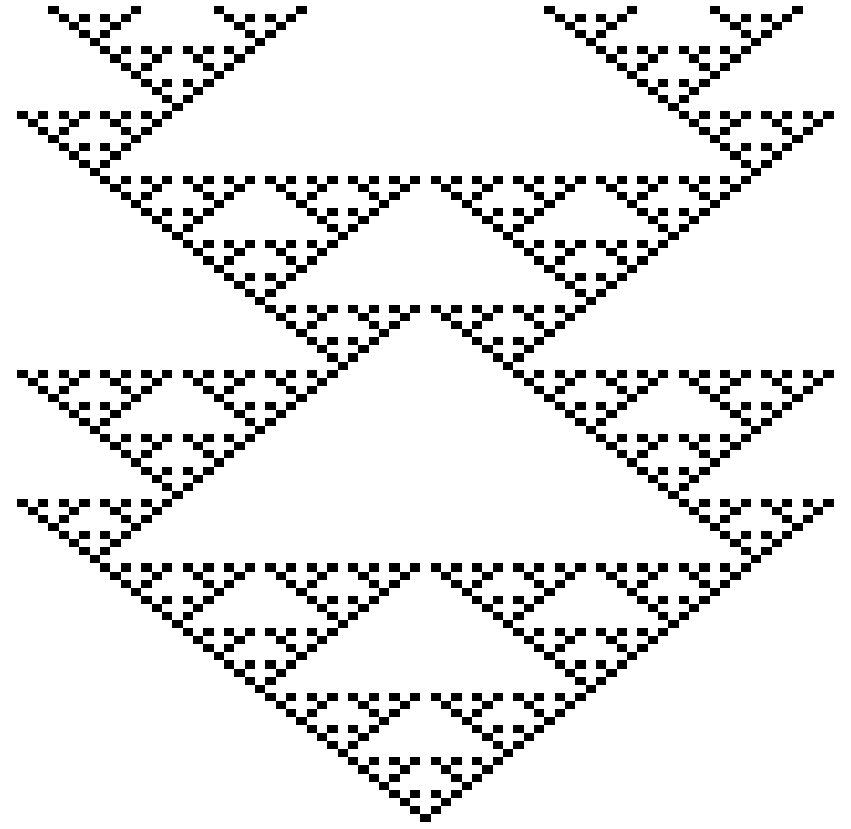

In [6]:
MAX_GEN = 100
init_state = '000000000000000000000000000000000000000010000000000000000000000000000000000000000'

states = generate_pattern(init_state, get_rule(90), MAX_GEN)
visualize_pattern(states, interval=10, save_as_gif=True, filename="cellular_automaton.gif", size=15)

#### Random execution

In [ ]:
MAX_GEN = 200
init_state_length = 300

init_state = random_init_state(init_state_length)
rule_number = interesting_rule_number()
print(f"Using rule number: {rule_number}")

states = generate_pattern(init_state, get_rule(rule_number), MAX_GEN)
visualize_pattern(states, interval=10, save_as_gif=True, filename="cellular_automaton.gif", size=15)